In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv('/Users/patrickfahy99/Documents/kaggle_datasets/loan-default-prediction/train.csv')
test = pd.read_csv('/Users/patrickfahy99/Documents/kaggle_datasets/loan-default-prediction/test.csv')
pd.set_option('display.max_columns', None)

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (135,204,274,417) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (417) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
invalid = train.select_dtypes(include=['object']).columns
train.drop(invalid, axis=1, inplace=True)
test.drop(invalid, axis=1, inplace=True)
test_id = test['id'].copy
test.drop('id', axis=1, inplace = True)

In [4]:
missing = train.isnull().sum()
missing = pd.DataFrame(missing[missing!=0])
missing.columns = ['No. of missing values']
missing['Percentage'] = 100*missing['No. of missing values']/train.id.count()
missing.sort_values(by="Percentage", ascending=False)

,No. of missing values,Percentage
f662,18833,17.856093
f663,18833,17.856093
f160,18736,17.764125
f159,18736,17.764125
f169,18417,17.461672
...,...,...
f675,1,0.000948
f678,1,0.000948
f677,1,0.000948
f765,1,0.000948


In [5]:
correlations = train.iloc[:,1:752].corr()
correlations.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,f119,f120,f121,f122,f123,f124,f125,f126,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,f167,f168,f169,f170,f171,f172,f173,f174,f175,f176,f177,f178,f179,f180,f181,f182,f183,f184,f185,f186,f187,f188,f189,f190,f191,f192,f193,f194,f195,f196,f197,f198,f199,f200,f201,f202,f203,f204,f205,f208,f209,f210,f211,f212,f213,f214,f215,f216,f217,f218,f219,f220,f221,f222,f223,f224,f225,f226,f227,f228,f229,f230,f231,f232,f233,f234,f235,f236,f237,f238,f239,f240,f241,f242,f243,f244,f245,f246,f247,f248,f249,f250,f251,f252,f253,f254,f255,f256,f257,f258,f259,f260,f261,f262,f263,f264,f265,f266,f267,f268,f269,f270,f271,f272,f273,f274,f275,f278,f279,f280,f281,f282,f283,f284,f285,f286,f287,f288,f289,f290,f291,f292,f293,f294,f295,f296,f297,f298,f299,f300,f301,f302,f303,f304,f305,f306,f307,f308,f309,f310,f311,f312,f313,f314,f315,f316,f317,f318,f319,f320,f321,f322,f323,f324,f325,f326,f327,f328,f329,f330,f331,f332,f333,f334,f335,f336,f337,f339,f340,f341,f342,f343,f344,f345,f346,f347,f348,f349,f350,f351,f352,f353,f354,f355,f356,f357,f358,f359,f360,f361,f362,f363,f364,f365,f366,f367,f368,f369,f370,f371,f372,f373,f374,f375,f376,f377,f378,f379,f380,f381,f382,f383,f384,f385,f386,f387,f388,f389,f392,f393,f394,f395,f396,f397,f398,f399,f400,f401,f402,f403,f404,f405,f406,f407,f408,f409,f410,f411,f412,f413,f414,f415,f416,f417,f418,f421,f422,f423,f424,f425,f426,f427,f428,f429,f430,f431,f432,f433,f434,f435,f436,f437,f438,f439,f440,f441,f442,f443,f444,f445,f446,f447,f448,f449,f450,f451,f452,f453,f454,f455,f456,f457,f458,f459,f460,f461,f464,f465,f466,f467,f468,f470,f471,f475,f476,f477,f478,f479,f480,f481,f482,f483,f484,f485,f486,f487,f488,f489,f490,f491,f492,f493,f494,f495,f496,f497,f498,f499,f500,f501,f502,f503,f504,f505,f506,f507,f508,f509,f510,f511,f512,f513,f514,f515,f516,f517,f518,f519,f520,f521,f522,f523,f524,f525,f526,f527,f528,f529,f530,f531,f532,f533,f535,f536,f538,f539,f540,f541,f542,f543,f544,f545,f546,f547,f548,f549,f550,f551,f552,f553,f554,f555,f556,f557,f558,f559,f560,f561,f562,f563,f564,f565,f566,f567,f568,f569,f570,f571,f572,f573,f574,f575,f576,f577,f578,f579,f580,f581,f582,f583,f584,f585,f586,f587,f588,f589,f590,f591,f592,f593,f594,f595,f596,f597,f598,f599,f600,f601,f604,f606,f607,f608,f609,f610,f611,f612,f613,f614,f615,f616,f617,f618,f619,f620,f621,f622,f623,f624,f625,f628,f629,f630,f631,f632,f633,f634,f635,f636,f637,f638,f639,f640,f641,f642,f643,f644,f645,f646,f647,f648,f649,f650,f651,f652,f653,f654,f655,f656,f657,f658,f659,f660,f661,f662,f663,f664,f665,f666,f667,f668,f669,f670,f671,f672,f673,f674,f675,f676,f677,f678,f679,f680,f681,f682,f683,f684,f685,f686,f687,f688,f689,f690,f691,f692,f693,f694,f696,f697,f699,f700,f701,f702,f703,f704,f705,f706,f707,f708,f709,f710,f711,f712,f713,f714,f715,f716,f717,f718,f719,f720,f721,f722,f723,f724,f725,f726,f727,f728,f729,f730,f731,f732,f733,f734,f735,f736,f737,f738,f739,f740,f741,f742,f743,f744,f745,f746,f747,f748,f749,f750,f751,f752,f753,f754,f755,f756,f757,f758,f759,f760,f761,f762,f763,f764,f765,f766,f767,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777,f778,loss
f1,1.000000,-0.210388,-0.000370,0.782389,-0.269849,0.102250,-0.160392,-0.174056,0.972323,0.998662,0.056130,-0.310058,-0.334836,-0.075052,-0.341328,-0.405630,-0.209396,-0.343040,-0.305110,-0.321924,0.730849,-0.299080,0.302254,0.317224,0.117610,-0.094827,0.026837,-0.138636,-0.027365,-0.236441,NaN,NaN,NaN,-0.081410,NaN,NaN,-0.516368,-0.428703,-0.58152

In [6]:
x = train.iloc[:,1:751].copy()
y = train.iloc[:,751].copy()
y.value_counts()

0     95688
2      1297
1      1145
3      1086
4      1038
      ...  
92        1
77        1
85        1
80        1
63        1
Name: loss, Length: 89, dtype: int64

In [7]:
y[y>0] = 1
y.value_counts()

0    95688
1     9783
Name: loss, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state=0)

In [9]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())
test = test.fillna(X_train.mean())
[X_train.isnull().sum().sum(), X_test.isnull().sum().sum(), test.isnull().sum().sum()]

[0, 0, 0]

In [10]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)
X_t = scalar.transform(test)

Text(0, 0.5, 'cumulative explained variance')

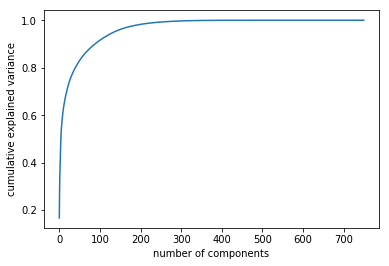

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [12]:
np.cumsum(pca.explained_variance_ratio_)[200]

0.9827484142421778

In [13]:
final_pca = PCA(n_components=200)
final_pca.fit(X_train)
X_train = final_pca.transform(X_train)
X_train = pd.DataFrame(data = X_train)
X_test = final_pca.transform(X_test)
X_test = pd.DataFrame(data = X_test)
X_t = final_pca.transform(X_t)
X_t = pd.DataFrame(data = X_t)

In [14]:
# Function to calculate mean absolute error
def cross_val(X_tr, y_tr, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_tr, y = y_tr, cv = 5, verbose = 3)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [15]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.907, total=  13.7s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.7s remaining:    0.0s


[CV] .................................... , score=0.906, total=  13.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.9s remaining:    0.0s


[CV] .................................... , score=0.907, total=  12.8s
[CV]  ................................................................
[CV] .................................... , score=0.907, total=  13.8s
[CV]  ................................................................
[CV] .................................... , score=0.907, total=  14.3s
Random Forest Performance on the test set: Cross Validation Score = 0.9068


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished


In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver= 'saga', class_weight='balanced',max_iter=500, random_state=1)
random_cross = fit_and_evaluate(model)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .................................... , score=0.642, total=  37.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.0s remaining:    0.0s


[CV] .................................... , score=0.641, total=  37.6s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV] .................................... , score=0.639, total=  40.7s
[CV]  ................................................................


/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] .................................... , score=0.641, total= 1.2min
[CV]  ................................................................
[CV] .................................... , score=0.636, total=  40.1s
Logistic Regression Performance on the test set: Cross Validation Score = 0.6398


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.8min finished


In [17]:
"""

from xgboost import XGBClassifier

random = XGBClassifier()
random_cross = fit_and_evaluate(random)

print('XGBClassifier on the test set: Cross Validation Score = %0.4f' % random_cross)

"""

"\n\nfrom xgboost import XGBClassifier\n\nrandom = XGBClassifier()\nrandom_cross = fit_and_evaluate(random)\n\nprint('XGBClassifier on the test set: Cross Validation Score = %0.4f' % random_cross)\n\n"

In [18]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 1])

In [19]:
import sklearn.metrics as sm
c = pd.DataFrame(sm.confusion_matrix(y_test, y_pred), index=['Actual non defaulter','Actual defaulter'])
c.columns = ['Predicted non defaulter','Predicted defaulter']
c['Actual Total'] = c.sum(axis=1)
c.loc['Predicted Total',:] = c.sum(axis = 0)
c

,Predicted non defaulter,Predicted defaulter,Actual Total
Actual non defaulter,15317.0,8605.0,23922.0
Actual defaulter,759.0,1687.0,2446.0
Predicted Total,16076.0,10292.0,26368.0


In [20]:
print(["The accuracy on the validation data is " + str(round(sm.accuracy_score(y_test, y_pred)*100,ndigits = 2)) + "%"])

['The accuracy on the validation data is 64.49%']


In [21]:
print("The sensitivity (true positive rate) is " + str(round(100*c.iloc[1,1]/c.iloc[1,2], ndigits=2)) + "%")

The sensitivity (true positive rate) is 68.97%


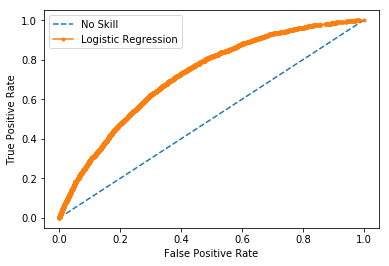

In [22]:
ns_fpr, ns_tpr, _ = sm.roc_curve(y_test, np.zeros(len(y_test)))
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_fpr, lr_tpr, _ = sm.roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [23]:
print(sm.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.64      0.77     23922
           1       0.16      0.69      0.26      2446

    accuracy                           0.64     26368
   macro avg       0.56      0.66      0.52     26368
weighted avg       0.88      0.64      0.72     26368



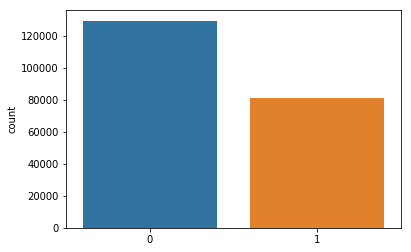

In [24]:
pred = model.predict(X_t)
sns.countplot(pred);

In [25]:
submission = pd.read_csv("/Users/patrickfahy99/Documents/kaggle_datasets/loan-default-prediction/sampleSubmission.csv")
submission['loss'] = pred